In [1]:
## Importing Libraries
import datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import random
import torch
import seaborn as sns
from collections import Counter
from sklearn.model_selection import train_test_split
from tensorflow.keras import Sequential,layers, losses, optimizers
from tensorflow.keras.layers import Dense
from sklearn.preprocessing import LabelEncoder
from keras.layers import GaussianNoise
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, precision_score

In [2]:
## Reading the packet based data
df = pd.read_csv("all_group_train_normalized.csv")

In [5]:
## Reading only Benign data
df1 = pd.read_csv("Benign Data.csv")

In [6]:
df1 = df1.loc[:, ~df1.columns.str.contains('^Unnamed')]

In [7]:
benign_data = df1.iloc[:,0:200]

In [8]:
benign_data

,ip_header_byte_2,ip_header_byte_3,ip_header_byte_4,ip_header_byte_5,ip_header_byte_6,ip_header_byte_7,ip_header_byte_8,ip_header_byte_10,ip_header_byte_11,tcp_header_byte_4,...,tcp_segment_data_byte_125,tcp_segment_data_byte_126,tcp_segment_data_byte_127,tcp_segment_data_byte_128,tcp_segment_data_byte_129,tcp_segment_data_byte_130,tcp_segment_data_byte_131,tcp_segment_data_byte_132,tcp_segment_data_byte_133,tcp_segment_data_byte_134
0,0.0,0.266667,0.098039,0.756863,0.25098,0.0,0.501961,0.015686,0.627451,0.858824,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.203922,0.400000,0.462745,0.25098,0.0,0.501961,0.690196,0.741176,0.333333,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.156863,0.294118,0.517647,0.25098,0.0,0.501961,0.823529,0.972549,0.858824,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.156863,0.321569,0.254902,0.25098,0.0,0.501961,0.800000,0.231373,0.858824,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.156863,0.035294,0.580392,0.25098,0.0,0.501961,0.078431,0.913725,0.858824,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142056,0.0,0.156863,0.074510,0.070588,0.25098,0.0,0.501961,0.043137,0.419608,0.858824,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
142057,0.0,0.156863,0.200000,0.533333,0.25098,0.0,0.501961,0.917647,0.956863,0.858824,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
142058,0.0,0.156863,0.450980,0.733333,0.25098,0.0,0.501961,0.666667,0.756863,0.858824,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
142059,0.0,0.156863,0.117647,0.439216,0.25098,0.0,0.501961,0.000000,0.050980,0.858824,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [11]:
X_train = benign_data

In [15]:
from keras.layers import LeakyReLU

In [17]:
## The model architecture
tf.random.set_seed(2)
input_dims = 200
model = Sequential()
model.add(Dense(input_dims, input_shape = (input_dims, )))
model.add(Dense(150, activation='relu'))

model.add(Dense(input_dims // 2, activation='relu'))
model.add(Dense(input_dims // 4, activation='relu'))
model.add(Dense(input_dims // 8, activation='relu'))
model.add(Dense(input_dims // 4, activation='relu'))
model.add(Dense(input_dims // 2))
model.add(Dense(150, activation='relu'))
model.add(Dense(input_dims, activation='relu'))

In [20]:
## Model Compilation and Training
model.compile(optimizer='adam', loss='mae')
model.fit(X_train, X_train, batch_size=256, epochs=500, shuffle=True)

Epoch 1/500
555/555 [==============================] - 1s 3ms/step - loss: 0.0176
Epoch 2/500
555/555 [==============================] - 1s 3ms/step - loss: 0.0099
Epoch 3/500
555/555 [==============================] - 1s 3ms/step - loss: 0.0083
Epoch 4/500
555/555 [==============================] - 1s 3ms/step - loss: 0.0078
Epoch 5/500
555/555 [==============================] - 1s 3ms/step - loss: 0.0074
Epoch 6/500
555/555 [==============================] - 1s 3ms/step - loss: 0.0062
Epoch 7/500
555/555 [==============================] - 1s 3ms/step - loss: 0.0058
Epoch 8/500
555/555 [==============================] - 1s 3ms/step - loss: 0.0055
Epoch 9/500
555/555 [==============================] - 2s 3ms/step - loss: 0.0054
Epoch 10/500
555/555 [==============================] - 2s 3ms/step - loss: 0.0054
Epoch 11/500
555/555 [==============================] - 1s 3ms/step - loss: 0.0053
Epoch 12/500
555/555 [==============================] - 1s 3ms/step - loss: 0.0052
Epoch 13/500


555/555 [==============================] - 2s 3ms/step - loss: 0.0029
Epoch 197/500
555/555 [==============================] - 2s 3ms/step - loss: 0.0029
Epoch 198/500
555/555 [==============================] - 2s 3ms/step - loss: 0.0029
Epoch 199/500
555/555 [==============================] - 2s 3ms/step - loss: 0.0029
Epoch 200/500
555/555 [==============================] - 2s 3ms/step - loss: 0.0029
Epoch 201/500
555/555 [==============================] - 2s 3ms/step - loss: 0.0029
Epoch 202/500
555/555 [==============================] - 2s 3ms/step - loss: 0.0029
Epoch 203/500
555/555 [==============================] - 2s 3ms/step - loss: 0.0029
Epoch 204/500
555/555 [==============================] - 2s 3ms/step - loss: 0.0029
Epoch 205/500
555/555 [==============================] - 2s 3ms/step - loss: 0.0029
Epoch 206/500
555/555 [==============================] - 2s 3ms/step - loss: 0.0029
Epoch 207/500
555/555 [==============================] - 2s 3ms/step - loss: 0.0029
Epoch 

555/555 [==============================] - 2s 3ms/step - loss: 0.0027
Epoch 391/500
555/555 [==============================] - 2s 3ms/step - loss: 0.0027
Epoch 392/500
555/555 [==============================] - 2s 3ms/step - loss: 0.0027
Epoch 393/500
555/555 [==============================] - 2s 3ms/step - loss: 0.0027
Epoch 394/500
555/555 [==============================] - 2s 3ms/step - loss: 0.0027
Epoch 395/500
555/555 [==============================] - 2s 3ms/step - loss: 0.0027
Epoch 396/500
555/555 [==============================] - 2s 3ms/step - loss: 0.0027
Epoch 397/500
555/555 [==============================] - 2s 3ms/step - loss: 0.0027
Epoch 398/500
555/555 [==============================] - 2s 3ms/step - loss: 0.0027
Epoch 399/500
555/555 [==============================] - 2s 3ms/step - loss: 0.0027
Epoch 400/500
555/555 [==============================] - 2s 3ms/step - loss: 0.0027
Epoch 401/500
555/555 [==============================] - 2s 3ms/step - loss: 0.0027
Epoch 

In [21]:
## Experiment 1

In [22]:
## Extracting different atatck types
infiltration_attack = df[df['Label'] == 'Infiltration'].drop(['Label_binary','Label'], axis=1).iloc[:,0:200]
print(infiltration_attack.shape)
portscan_attack = df[df['Label'] == 'Port Scan'].drop(['Label_binary','Label'], axis=1).iloc[:,0:200]
print(portscan_attack.shape)
ddos_attack = df[df['Label'] == 'DDoS'].drop(['Label_binary','Label'], axis=1).iloc[:,0:200]
print(ddos_attack.shape)
bruteforce_attack = df[df['Label'] == 'Brute Force'].drop(['Label_binary','Label'], axis=1).iloc[:,0:200]
print(bruteforce_attack.shape)
dos_attack = df[df['Label'] == 'DoS'].drop(['Label_binary','Label'], axis=1).iloc[:,0:200]
print(dos_attack.shape)
web_attack = df[df['Label'] == 'Web Attack'].drop(['Label_binary','Label'], axis=1).iloc[:,0:200]
print(web_attack.shape)

(8905, 200)
(8905, 200)
(8905, 200)
(8905, 200)
(8906, 200)
(8906, 200)


In [23]:
# infiltration_attack = df_2018[df_2018['Label'] == 'Infiltration'].drop(['Label_binary','Label'], axis=1).iloc[:,0:200]
# print(infiltration_attack.shape)
# # portscan_attack = df_2018[df_2018['Label'] == 'Port Scan'].drop(['Label_binary','Label'], axis=1).iloc[:,0:200]
# # print(portscan_attack.shape)
# ddos_attack = df_2018[df_2018['Label'] == 'ddos'].drop(['Label_binary','Label'], axis=1).iloc[:,0:200]
# print(ddos_attack.shape)
# bruteforce_attack = df_2018[df_2018['Label'] == 'Brute Force'].drop(['Label_binary','Label'], axis=1).iloc[:,0:200]
# print(bruteforce_attack.shape)
# dos_attack = df_2018[df_2018['Label'] == 'DoS'].drop(['Label_binary','Label'], axis=1).iloc[:,0:200]
# print(dos_attack.shape)
# web_attack = df_2018[df_2018['Label'] == 'Web Attack'].drop(['Label_binary','Label'], axis=1).iloc[:,0:200]
# print(web_attack.shape)

In [24]:
## The pbRe metric
def recon_metrices(data, reconstructed_data):

    maes = np.absolute(data.values - reconstructed_data)
    
    for j in range(len(maes)):
        m = maes[j]
        r = reconstructed_data[j]
        for el in range(len(m)):
            if r[el] == 0:
                m[el] = 0
 
            
    mae_byte_list = []
    ip_mae_list = []
    tcp_header_mae_list = []
    tcp_options_mae_list = []
    tcp_segment_mae_list = []
    i=0
    for mae in maes:
        mae_byte = sum(mae) / np.count_nonzero(reconstructed_data[i])
        mae_byte_list.append(mae_byte)
        
        if np.count_nonzero(reconstructed_data[i][0:9]) != 0:
            ip_mae = sum(mae[0:9])/np.count_nonzero(reconstructed_data[i][0:9])
        else:
            ip_mae = 0
        ip_mae_list.append(ip_mae)

        if np.count_nonzero(reconstructed_data[i][9:25]) != 0:
            tcp_header_mae = sum(mae[9:25])/np.count_nonzero(reconstructed_data[i][9:25])
        else:
            tcp_header_mae = 0
        tcp_header_mae_list.append(tcp_header_mae)

        if np.count_nonzero(reconstructed_data[i][25:65]) != 0:
            tcp_options_mae = sum(mae[25:65])/np.count_nonzero(reconstructed_data[i][25:65])
        else:
            tcp_options_mae = 0
        tcp_options_mae_list.append(tcp_options_mae)

        if np.count_nonzero(reconstructed_data[i][65:200]) != 0:
            tcp_segment_mae = sum(mae[65:200])/np.count_nonzero(reconstructed_data[i][65:200])
        else:
            tcp_segment_mae = 0
        tcp_segment_mae_list.append(tcp_segment_mae)
        i += 1
    return mae_byte_list, ip_mae_list, tcp_header_mae_list, tcp_options_mae_list, tcp_segment_mae_list

In [25]:
## Reconstructing the Benign test data
recon_x_test_normal = model.predict(benign_data)

In [26]:
diff = []
for i in range(len(recon_x_test_normal)):
    diff.append(np.count_nonzero(recon_x_test_normal[i]) - np.count_nonzero(benign_data.iloc[i].values))

In [27]:
pos = 0
neg = 0
zer = 0
for el in diff:
    if el > 0:
        pos+=1
    elif el < 0:
        neg +=1
    else:
        zer += 1

In [31]:
mae_byte_list_normal, ip_mae_list_normal, tcp_header_mae_list_normal, tcp_options_mae_list_normal, tcp_segment_mae_list_normal = recon_metrices(benign_data, recon_x_test_normal)

In [129]:
# save numpy array as csv file
from numpy import asarray
from numpy import savetxt

savetxt('AE_benign_MAE.csv', mae_byte_list_normal, delimiter=',')

In [32]:
ben_recon = benign_data.copy(deep = True)

In [33]:
ben_recon['recon error'] = mae_byte_list_normal

In [36]:
sorted_df = ben_recon.sort_values(by=['recon error'], ascending= False)

In [37]:
sorted_df

,ip_header_byte_2,ip_header_byte_3,ip_header_byte_4,ip_header_byte_5,ip_header_byte_6,ip_header_byte_7,ip_header_byte_8,ip_header_byte_10,ip_header_byte_11,tcp_header_byte_4,...,tcp_segment_data_byte_126,tcp_segment_data_byte_127,tcp_segment_data_byte_128,tcp_segment_data_byte_129,tcp_segment_data_byte_130,tcp_segment_data_byte_131,tcp_segment_data_byte_132,tcp_segment_data_byte_133,tcp_segment_data_byte_134,recon error
117454,0.356863,0.407843,0.141176,1.000000,0.25098,0.0,0.501961,0.513725,0.247059,0.729412,...,0.149020,0.674510,0.164706,0.615686,0.749020,0.549020,0.180392,0.733333,0.003922,0.243841
91738,0.043137,0.564706,0.325490,0.294118,0.25098,0.0,0.501961,0.086275,0.772549,0.952941,...,0.188235,0.505882,0.941176,0.070588,0.949020,0.803922,0.066667,0.066667,0.447059,0.241493
111746,0.000000,0.796078,0.058824,0.509804,0.25098,0.0,0.501961,0.400000,0.447059,0.294118,...,0.956863,0.960784,0.062745,0.972549,0.945098,0.035294,0.368627,0.576471,0.125490,0.238324
107270,0.027451,0.239216,0.458824,0.223529,0.25098,0.0,0.501961,0.564706,0.596078,0.247059,...,0.035294,0.486275,0.796078,0.058824,0.745098,0.521569,0.776471,0.047059,0.356863,0.238003
3981,0.007843,0.050980,0.325490,0.431373,0.25098,0.0,0.501961,0.125490,0.145098,0.784314,...,0.784314,0.968627,0.615686,0.039216,0.243137,0.321569,0.423529,0.266667,0.694118,0.237545
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71722,0.000000,0.156863,0.231373,0.850980,0.25098,0.0,0.501961,0.886275,0.639216,0.858824,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.001482
136038,0.000000,0.156863,0.419608,0.705882,0.25098,0.0,0.501961,0.698039,0.784314,0.858824,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.001479
21518,0.000000,0.156863,0.231373,0.960784,0.25098,0.0,0.501961,0.886275,0.529412,0.858824,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.001406
30289,0.000000,0.156863,0.407843,0.984314,0.25098,0.0,0.501961,0.709804,0.505882,0.858824,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.001391


In [41]:
## Creating Threshold for the benign data
mae_byte_avg = sum(mae_byte_list_normal) / np.count_nonzero(mae_byte_list_normal)
print('mae_byte_avg', mae_byte_avg)
mae_byte_per_95 = np.percentile(mae_byte_list_normal, 99)
print('mae_byte_99_percentile', mae_byte_per_95)
mae_byte_per_95 = np.percentile(mae_byte_list_normal, 95)
print('mae_byte_95_percentile', mae_byte_per_95)
mae_byte_per_95 = np.percentile(mae_byte_list_normal, 90)
print('mae_byte_90_percentile', mae_byte_per_95)
ip_mae_avg = sum(ip_mae_list_normal) / np.count_nonzero(ip_mae_list_normal)
print('ip_mae_avg', ip_mae_avg)
tcp_header_mae_avg = sum(tcp_header_mae_list_normal) / np.count_nonzero(tcp_header_mae_list_normal)
print('tcp_header_mae_avg', tcp_header_mae_avg)
tcp_options_mae_avg = sum(tcp_options_mae_list_normal) / np.count_nonzero(tcp_options_mae_list_normal)
print('tcp_header_mae_avg', tcp_options_mae_avg)
tcp_segment_mae_avg = sum(tcp_segment_mae_list_normal) / np.count_nonzero(tcp_segment_mae_list_normal)
print('tcp_segment_mae_avg', tcp_segment_mae_avg)

mae_byte_avg 0.0058997844540619685
mae_byte_99_percentile 0.08650690534541394
mae_byte_95_percentile 0.011059652508960833
mae_byte_90_percentile 0.005966106533698119
ip_mae_avg 0.004604706382086877
tcp_header_mae_avg 0.0065267964016761494
tcp_header_mae_avg 0.02469298706832296
tcp_segment_mae_avg 0.13249047386644824


In [ ]:
## Reconstructing different attack types and aversarial examples and Classifying them based on the thresholds

In [43]:
recon_portscan = model.predict(portscan_attack)

In [44]:
mae_byte_list, ip_mae_list, tcp_header_mae_list, tcp_options_mae_list, tcp_segment_mae_list = recon_metrices(portscan_attack, recon_portscan)

In [45]:
# save numpy array as csv file
from numpy import asarray
from numpy import savetxt

savetxt('AE_portscan_MAE.csv', mae_byte_list, delimiter=',')

In [46]:
g = pd.read_csv('AE_portscan_MAE.csv', header = None)

In [ ]:
g

In [48]:
## Classification
count_99 = len([i for i in mae_byte_list if i > 0.086])
print(count_99 / len(mae_byte_list))
count_95 = len([i for i in mae_byte_list if i > 0.011])
print(count_95 / len(mae_byte_list))
count_90 = len([i for i in mae_byte_list if i > 0.005])
print(count_90 / len(mae_byte_list))

0.9987647389107243
1.0
1.0


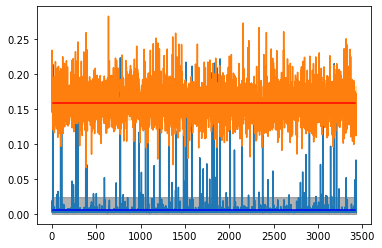

In [49]:
## Portscan mae byte
AE_normal_mae = mae_byte_list_normal[0:3432]
plt.plot(AE_normal_mae)
plt.fill_between([i for i in range(3432)],np.array(AE_normal_mae).mean() + np.array(AE_normal_mae).std(),\
                 max(np.array(AE_normal_mae).mean() - np.array(AE_normal_mae).std(),0),color = "black",alpha = 0.3)
plt.axhline(y = np.array(AE_normal_mae).mean(), color = 'blue', linestyle = '-',xmin = 0.05, xmax = 0.95)

AE_infiltration_attack_mae = mae_byte_list[0:3432]
plt.plot(AE_infiltration_attack_mae)
plt.fill_between([i for i in range(3432)],np.array(AE_infiltration_attack_mae).mean() - np.array(AE_infiltration_attack_mae).std(),\
                 np.array(AE_infiltration_attack_mae).mean() + np.array(AE_infiltration_attack_mae).std(),color = "orange",alpha = 0.3)
plt.axhline(y = np.array(AE_infiltration_attack_mae).mean(), color = 'r', linestyle = '-',xmin = 0.05, xmax = 0.95)

In [ ]:
## Portscan IP header
AE_normal_mae = ip_mae_list_normal[0:3432]
plt.plot(AE_normal_mae)
plt.fill_between([i for i in range(3432)],np.array(AE_normal_mae).mean() + np.array(AE_normal_mae).std(),\
                 max(np.array(AE_normal_mae).mean() - np.array(AE_normal_mae).std(),0),color = "black",alpha = 0.3)
plt.axhline(y = np.array(AE_normal_mae).mean(), color = 'blue', linestyle = '-',xmin = 0.05, xmax = 0.95)

AE_infiltration_attack_mae = ip_mae_list[0:3432]
plt.plot(AE_infiltration_attack_mae)
plt.fill_between([i for i in range(3432)],np.array(AE_infiltration_attack_mae).mean() - np.array(AE_infiltration_attack_mae).std(),\
                 np.array(AE_infiltration_attack_mae).mean() + np.array(AE_infiltration_attack_mae).std(),color = "orange",alpha = 0.3)
plt.axhline(y = np.array(AE_infiltration_attack_mae).mean(), color = 'r', linestyle = '-',xmin = 0.05, xmax = 0.95)

In [ ]:
## Portscan TCP header
AE_normal_mae = tcp_header_mae_list_normal[0:3432]
plt.plot(AE_normal_mae)
plt.fill_between([i for i in range(3432)],np.array(AE_normal_mae).mean() + np.array(AE_normal_mae).std(),\
                 max(np.array(AE_normal_mae).mean() - np.array(AE_normal_mae).std(),0),color = "black",alpha = 0.3)
plt.axhline(y = np.array(AE_normal_mae).mean(), color = 'blue', linestyle = '-',xmin = 0.05, xmax = 0.95)

AE_infiltration_attack_mae = tcp_header_mae_list[0:3432]
plt.plot(AE_infiltration_attack_mae)
plt.fill_between([i for i in range(3432)],np.array(AE_infiltration_attack_mae).mean() - np.array(AE_infiltration_attack_mae).std(),\
                 np.array(AE_infiltration_attack_mae).mean() + np.array(AE_infiltration_attack_mae).std(),color = "orange",alpha = 0.3)
plt.axhline(y = np.array(AE_infiltration_attack_mae).mean(), color = 'r', linestyle = '-',xmin = 0.05, xmax = 0.95)

In [ ]:
## Portscan TCP Options
AE_normal_mae = tcp_options_mae_list_normal[0:3432]
plt.plot(AE_normal_mae)
plt.fill_between([i for i in range(3432)],np.array(AE_normal_mae).mean() + np.array(AE_normal_mae).std(),\
                 max(np.array(AE_normal_mae).mean() - np.array(AE_normal_mae).std(),0),color = "black",alpha = 0.3)
plt.axhline(y = np.array(AE_normal_mae).mean(), color = 'blue', linestyle = '-',xmin = 0.05, xmax = 0.95)

AE_infiltration_attack_mae = tcp_options_mae_list[0:3432]
plt.plot(AE_infiltration_attack_mae)
plt.fill_between([i for i in range(3432)],np.array(AE_infiltration_attack_mae).mean() - np.array(AE_infiltration_attack_mae).std(),\
                 np.array(AE_infiltration_attack_mae).mean() + np.array(AE_infiltration_attack_mae).std(),color = "orange",alpha = 0.3)
plt.axhline(y = np.array(AE_infiltration_attack_mae).mean(), color = 'r', linestyle = '-',xmin = 0.05, xmax = 0.95)

In [ ]:
## Portscan Segment
AE_normal_mae = tcp_segment_mae_list_normal[0:3432]
plt.plot(AE_normal_mae)
plt.fill_between([i for i in range(3432)],np.array(AE_normal_mae).mean() + np.array(AE_normal_mae).std(),\
                 max(np.array(AE_normal_mae).mean() - np.array(AE_normal_mae).std(),0),color = "black",alpha = 0.3)
plt.axhline(y = np.array(AE_normal_mae).mean(), color = 'blue', linestyle = '-',xmin = 0.05, xmax = 0.95)

AE_infiltration_attack_mae = tcp_segment_mae_list[0:3432]
plt.plot(AE_infiltration_attack_mae)
plt.fill_between([i for i in range(3432)],np.array(AE_infiltration_attack_mae).mean() - np.array(AE_infiltration_attack_mae).std(),\
                 np.array(AE_infiltration_attack_mae).mean() + np.array(AE_infiltration_attack_mae).std(),color = "orange",alpha = 0.3)
plt.axhline(y = np.array(AE_infiltration_attack_mae).mean(), color = 'r', linestyle = '-',xmin = 0.05, xmax = 0.95)

In [50]:
mae_byte_avg = sum(mae_byte_list) / np.count_nonzero(mae_byte_list)
print('mae_byte_avg', mae_byte_avg)
mae_byte_per_95 = np.percentile(mae_byte_list, 99)
print('mae_byte_99_percentile', mae_byte_per_95)
mae_byte_per_95 = np.percentile(mae_byte_list, 95)
print('mae_byte_95_percentile', mae_byte_per_95)
mae_byte_per_95 = np.percentile(mae_byte_list, 90)
print('mae_byte_90_percentile', mae_byte_per_95)
ip_mae_avg = sum(ip_mae_list) / np.count_nonzero(ip_mae_list)
print('ip_mae_avg', ip_mae_avg)
tcp_header_mae_avg = sum(tcp_header_mae_list) / np.count_nonzero(tcp_header_mae_list)
print('tcp_header_mae_avg', tcp_header_mae_avg)
tcp_options_mae_avg = sum(tcp_options_mae_list) / np.count_nonzero(tcp_options_mae_list)
print('tcp_header_mae_avg', tcp_options_mae_avg)
tcp_segment_mae_avg = sum(tcp_segment_mae_list) / np.count_nonzero(tcp_segment_mae_list)
print('tcp_segment_mae_avg', tcp_segment_mae_avg)

mae_byte_avg 0.1590325615563837
mae_byte_99_percentile 0.22857108039845442
mae_byte_95_percentile 0.1996277378546788
mae_byte_90_percentile 0.18902473435230863
ip_mae_avg 0.17894609191023966
tcp_header_mae_avg 0.11068742403517057
tcp_header_mae_avg 0.25310415659713287
tcp_segment_mae_avg 0.09135376327331882


In [51]:
recon_dos = model.predict(dos_attack)

In [52]:
mae_byte_list, ip_mae_list, tcp_header_mae_list, tcp_options_mae_list, tcp_segment_mae_list = recon_metrices(dos_attack, recon_dos)

In [53]:
# save numpy array as csv file
from numpy import asarray
from numpy import savetxt

savetxt('AE_dos_MAE.csv', mae_byte_list, delimiter=',')

In [54]:
## Classification
count_99 = len([i for i in mae_byte_list if i > 0.086])
print(count_99 / len(mae_byte_list))
count_95 = len([i for i in mae_byte_list if i > 0.011])
print(count_95 / len(mae_byte_list))
count_90 = len([i for i in mae_byte_list if i > 0.005])
print(count_90 / len(mae_byte_list))

0.9522793622277117
1.0
1.0


In [ ]:
np.array(AE_normal_mae).mean()

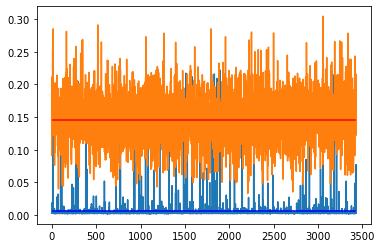

In [55]:
## DoS mae byte
AE_normal_mae = mae_byte_list_normal[0:3432]
plt.plot(AE_normal_mae)
# # plt.fill_between([i for i in range(3432)],np.array(AE_normal_mae).mean() + np.array(AE_normal_mae).std(),\
#                  max(np.array(AE_normal_mae).mean() - np.array(AE_normal_mae).std(),0),color = "black",alpha = 0.3)


AE_infiltration_attack_mae = mae_byte_list[0:3432]
plt.plot(AE_infiltration_attack_mae)
plt.axhline(y = np.array(AE_normal_mae).mean(), color = 'blue', linestyle = '-',xmin = 0.05, xmax = 0.95)
# plt.fill_between([i for i in range(3432)],np.array(AE_infiltration_attack_mae).mean() - np.array(AE_infiltration_attack_mae).std(),\
#                  np.array(AE_infiltration_attack_mae).mean() + np.array(AE_infiltration_attack_mae).std(),color = "orange",alpha = 0.3)
plt.axhline(y = np.array(AE_infiltration_attack_mae).mean(), color = 'r', linestyle = '-',xmin = 0.05, xmax = 0.95)

In [ ]:
## DoS IP header
AE_normal_mae = ip_mae_list_normal[0:3432]
plt.plot(AE_normal_mae)
plt.fill_between([i for i in range(3432)],np.array(AE_normal_mae).mean() + np.array(AE_normal_mae).std(),\
                 max(np.array(AE_normal_mae).mean() - np.array(AE_normal_mae).std(),0),color = "black",alpha = 0.3)
plt.axhline(y = np.array(AE_normal_mae).mean(), color = 'blue', linestyle = '-',xmin = 0.05, xmax = 0.95)

AE_infiltration_attack_mae = ip_mae_list[0:3432]
plt.plot(AE_infiltration_attack_mae)
plt.fill_between([i for i in range(3432)],np.array(AE_infiltration_attack_mae).mean() - np.array(AE_infiltration_attack_mae).std(),\
                 np.array(AE_infiltration_attack_mae).mean() + np.array(AE_infiltration_attack_mae).std(),color = "orange",alpha = 0.3)
plt.axhline(y = np.array(AE_infiltration_attack_mae).mean(), color = 'r', linestyle = '-',xmin = 0.05, xmax = 0.95)

In [ ]:
## DoS TCP header
AE_normal_mae = tcp_header_mae_list_normal[0:3432]
plt.plot(AE_normal_mae)
plt.fill_between([i for i in range(3432)],np.array(AE_normal_mae).mean() + np.array(AE_normal_mae).std(),\
                 max(np.array(AE_normal_mae).mean() - np.array(AE_normal_mae).std(),0),color = "black",alpha = 0.3)
plt.axhline(y = np.array(AE_normal_mae).mean(), color = 'blue', linestyle = '-',xmin = 0.05, xmax = 0.95)

AE_infiltration_attack_mae = tcp_header_mae_list[0:3432]
plt.plot(AE_infiltration_attack_mae)
plt.fill_between([i for i in range(3432)],np.array(AE_infiltration_attack_mae).mean() - np.array(AE_infiltration_attack_mae).std(),\
                 np.array(AE_infiltration_attack_mae).mean() + np.array(AE_infiltration_attack_mae).std(),color = "orange",alpha = 0.3)
plt.axhline(y = np.array(AE_infiltration_attack_mae).mean(), color = 'r', linestyle = '-',xmin = 0.05, xmax = 0.95)

In [ ]:
## DoS TCP Options
AE_normal_mae = tcp_options_mae_list_normal[0:3432]
plt.plot(AE_normal_mae)
plt.fill_between([i for i in range(3432)],np.array(AE_normal_mae).mean() + np.array(AE_normal_mae).std(),\
                 max(np.array(AE_normal_mae).mean() - np.array(AE_normal_mae).std(),0),color = "black",alpha = 0.3)
plt.axhline(y = np.array(AE_normal_mae).mean(), color = 'blue', linestyle = '-',xmin = 0.05, xmax = 0.95)

AE_infiltration_attack_mae = tcp_options_mae_list[0:3432]
plt.plot(AE_infiltration_attack_mae)
plt.fill_between([i for i in range(3432)],np.array(AE_infiltration_attack_mae).mean() - np.array(AE_infiltration_attack_mae).std(),\
                 np.array(AE_infiltration_attack_mae).mean() + np.array(AE_infiltration_attack_mae).std(),color = "orange",alpha = 0.3)
plt.axhline(y = np.array(AE_infiltration_attack_mae).mean(), color = 'r', linestyle = '-',xmin = 0.05, xmax = 0.95)

In [ ]:
## DoS Segment
AE_normal_mae = tcp_segment_mae_list_normal[0:3432]
plt.plot(AE_normal_mae)
plt.fill_between([i for i in range(3432)],np.array(AE_normal_mae).mean() + np.array(AE_normal_mae).std(),\
                 max(np.array(AE_normal_mae).mean() - np.array(AE_normal_mae).std(),0),color = "black",alpha = 0.3)
plt.axhline(y = np.array(AE_normal_mae).mean(), color = 'blue', linestyle = '-',xmin = 0.05, xmax = 0.95)

AE_infiltration_attack_mae = tcp_segment_mae_list[0:3432]
plt.plot(AE_infiltration_attack_mae)
plt.fill_between([i for i in range(3432)],np.array(AE_infiltration_attack_mae).mean() - np.array(AE_infiltration_attack_mae).std(),\
                 np.array(AE_infiltration_attack_mae).mean() + np.array(AE_infiltration_attack_mae).std(),color = "orange",alpha = 0.3)
plt.axhline(y = np.array(AE_infiltration_attack_mae).mean(), color = 'r', linestyle = '-',xmin = 0.05, xmax = 0.95)

In [56]:
mae_byte_avg = sum(mae_byte_list) / np.count_nonzero(mae_byte_list)
print('mae_byte_avg', mae_byte_avg)
mae_byte_per_95 = np.percentile(mae_byte_list, 99)
print('mae_byte_99_percentile', mae_byte_per_95)
mae_byte_per_95 = np.percentile(mae_byte_list, 95)
print('mae_byte_95_percentile', mae_byte_per_95)
mae_byte_per_95 = np.percentile(mae_byte_list, 90)
print('mae_byte_90_percentile', mae_byte_per_95)
ip_mae_avg = sum(ip_mae_list) / np.count_nonzero(ip_mae_list)
print('ip_mae_avg', ip_mae_avg)
tcp_header_mae_avg = sum(tcp_header_mae_list) / np.count_nonzero(tcp_header_mae_list)
print('tcp_header_mae_avg', tcp_header_mae_avg)
tcp_options_mae_avg = sum(tcp_options_mae_list) / np.count_nonzero(tcp_options_mae_list)
print('tcp_header_mae_avg', tcp_options_mae_avg)
tcp_segment_mae_avg = sum(tcp_segment_mae_list) / np.count_nonzero(tcp_segment_mae_list)
print('tcp_segment_mae_avg', tcp_segment_mae_avg)

mae_byte_avg 0.14612589031051001
mae_byte_99_percentile 0.24638524519822785
mae_byte_95_percentile 0.20652736326015123
mae_byte_90_percentile 0.19257576477884214
ip_mae_avg 0.17840584500009218
tcp_header_mae_avg 0.13346804165634196
tcp_header_mae_avg 0.24130173889690562
tcp_segment_mae_avg 0.11528573732106563


In [57]:
recon_ddos = model.predict(ddos_attack)

In [58]:
mae_byte_list, ip_mae_list, tcp_header_mae_list, tcp_options_mae_list, tcp_segment_mae_list = recon_metrices(ddos_attack, recon_ddos)

In [59]:
# save numpy array as csv file
from numpy import asarray
from numpy import savetxt

savetxt('AE_ddos_MAE.csv', mae_byte_list, delimiter=',')

In [60]:
## Classification
count_99 = len([i for i in mae_byte_list if i > 0.086])
print(count_99 / len(mae_byte_list))
count_95 = len([i for i in mae_byte_list if i > 0.011])
print(count_95 / len(mae_byte_list))
count_90 = len([i for i in mae_byte_list if i > 0.005])
print(count_90 / len(mae_byte_list))

0.1412689500280741
1.0
1.0


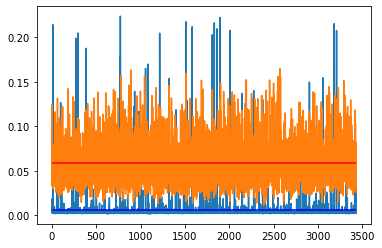

In [62]:
## DDoS
AE_normal_mae = mae_byte_list_normal[0:3432]
plt.plot(AE_normal_mae)
# plt.fill_between([i for i in range(3432)],np.array(AE_normal_mae).mean() + np.array(AE_normal_mae).std(),\
#                  max(np.array(AE_normal_mae).mean() - np.array(AE_normal_mae).std(),0),color = "black",alpha = 0.3)
plt.axhline(y = np.array(AE_normal_mae).mean(), color = 'blue', linestyle = '-',xmin = 0.05, xmax = 0.95)

AE_infiltration_attack_mae = mae_byte_list[0:3432]
plt.plot(AE_infiltration_attack_mae)
# plt.fill_between([i for i in range(3432)],np.array(AE_infiltration_attack_mae).mean() - np.array(AE_infiltration_attack_mae).std(),\
#                  np.array(AE_infiltration_attack_mae).mean() + np.array(AE_infiltration_attack_mae).std(),color = "orange",alpha = 0.3)
plt.axhline(y = np.array(AE_infiltration_attack_mae).mean(), color = 'r', linestyle = '-',xmin = 0.05, xmax = 0.95)

In [ ]:
## DDoS IP header
AE_normal_mae = ip_mae_list_normal[0:3432]
plt.plot(AE_normal_mae)
plt.fill_between([i for i in range(3432)],np.array(AE_normal_mae).mean() + np.array(AE_normal_mae).std(),\
                 max(np.array(AE_normal_mae).mean() - np.array(AE_normal_mae).std(),0),color = "black",alpha = 0.3)
plt.axhline(y = np.array(AE_normal_mae).mean(), color = 'blue', linestyle = '-',xmin = 0.05, xmax = 0.95)

AE_infiltration_attack_mae = ip_mae_list[0:3432]
plt.plot(AE_infiltration_attack_mae)
plt.fill_between([i for i in range(3432)],np.array(AE_infiltration_attack_mae).mean() - np.array(AE_infiltration_attack_mae).std(),\
                 np.array(AE_infiltration_attack_mae).mean() + np.array(AE_infiltration_attack_mae).std(),color = "orange",alpha = 0.3)
plt.axhline(y = np.array(AE_infiltration_attack_mae).mean(), color = 'r', linestyle = '-',xmin = 0.05, xmax = 0.95)

In [ ]:
## DDoS TCP header
AE_normal_mae = tcp_header_mae_list_normal[0:3432]
plt.plot(AE_normal_mae)
plt.fill_between([i for i in range(3432)],np.array(AE_normal_mae).mean() + np.array(AE_normal_mae).std(),\
                 max(np.array(AE_normal_mae).mean() - np.array(AE_normal_mae).std(),0),color = "black",alpha = 0.3)
plt.axhline(y = np.array(AE_normal_mae).mean(), color = 'blue', linestyle = '-',xmin = 0.05, xmax = 0.95)

AE_infiltration_attack_mae = tcp_header_mae_list[0:3432]
plt.plot(AE_infiltration_attack_mae)
plt.fill_between([i for i in range(3432)],np.array(AE_infiltration_attack_mae).mean() - np.array(AE_infiltration_attack_mae).std(),\
                 np.array(AE_infiltration_attack_mae).mean() + np.array(AE_infiltration_attack_mae).std(),color = "orange",alpha = 0.3)
plt.axhline(y = np.array(AE_infiltration_attack_mae).mean(), color = 'r', linestyle = '-',xmin = 0.05, xmax = 0.95)

In [ ]:
## DDoS TCP Options
AE_normal_mae = tcp_options_mae_list_normal[0:3432]
plt.plot(AE_normal_mae)
plt.fill_between([i for i in range(3432)],np.array(AE_normal_mae).mean() + np.array(AE_normal_mae).std(),\
                 max(np.array(AE_normal_mae).mean() - np.array(AE_normal_mae).std(),0),color = "black",alpha = 0.3)
plt.axhline(y = np.array(AE_normal_mae).mean(), color = 'blue', linestyle = '-',xmin = 0.05, xmax = 0.95)

AE_infiltration_attack_mae = tcp_options_mae_list[0:3432]
plt.plot(AE_infiltration_attack_mae)
plt.fill_between([i for i in range(3432)],np.array(AE_infiltration_attack_mae).mean() - np.array(AE_infiltration_attack_mae).std(),\
                 np.array(AE_infiltration_attack_mae).mean() + np.array(AE_infiltration_attack_mae).std(),color = "orange",alpha = 0.3)
plt.axhline(y = np.array(AE_infiltration_attack_mae).mean(), color = 'r', linestyle = '-',xmin = 0.05, xmax = 0.95)

In [ ]:
## DDoS Segment
AE_normal_mae = tcp_segment_mae_list_normal[0:3432]
plt.plot(AE_normal_mae)
plt.fill_between([i for i in range(3432)],np.array(AE_normal_mae).mean() + np.array(AE_normal_mae).std(),\
                 max(np.array(AE_normal_mae).mean() - np.array(AE_normal_mae).std(),0),color = "black",alpha = 0.3)
plt.axhline(y = np.array(AE_normal_mae).mean(), color = 'blue', linestyle = '-',xmin = 0.05, xmax = 0.95)

AE_infiltration_attack_mae = tcp_segment_mae_list[0:3432]
plt.plot(AE_infiltration_attack_mae)
plt.fill_between([i for i in range(3432)],np.array(AE_infiltration_attack_mae).mean() - np.array(AE_infiltration_attack_mae).std(),\
                 np.array(AE_infiltration_attack_mae).mean() + np.array(AE_infiltration_attack_mae).std(),color = "orange",alpha = 0.3)
plt.axhline(y = np.array(AE_infiltration_attack_mae).mean(), color = 'r', linestyle = '-',xmin = 0.05, xmax = 0.95)

In [63]:
mae_byte_avg = sum(mae_byte_list) / np.count_nonzero(mae_byte_list)
print('mae_byte_avg', mae_byte_avg)
mae_byte_per_95 = np.percentile(mae_byte_list, 99)
print('mae_byte_99_percentile', mae_byte_per_95)
mae_byte_per_95 = np.percentile(mae_byte_list, 95)
print('mae_byte_95_percentile', mae_byte_per_95)
mae_byte_per_95 = np.percentile(mae_byte_list, 90)
print('mae_byte_90_percentile', mae_byte_per_95)
ip_mae_avg = sum(ip_mae_list) / np.count_nonzero(ip_mae_list)
print('ip_mae_avg', ip_mae_avg)
tcp_header_mae_avg = sum(tcp_header_mae_list) / np.count_nonzero(tcp_header_mae_list)
print('tcp_header_mae_avg', tcp_header_mae_avg)
tcp_options_mae_avg = sum(tcp_options_mae_list) / np.count_nonzero(tcp_options_mae_list)
print('tcp_header_mae_avg', tcp_options_mae_avg)
tcp_segment_mae_avg = sum(tcp_segment_mae_list) / np.count_nonzero(tcp_segment_mae_list)
print('tcp_segment_mae_avg', tcp_segment_mae_avg)

mae_byte_avg 0.05916520689539085
mae_byte_99_percentile 0.13728642900475893
mae_byte_95_percentile 0.10935129738462362
mae_byte_90_percentile 0.09465554780947258
ip_mae_avg 0.09482925902129391
tcp_header_mae_avg 0.040481113348566085
tcp_header_mae_avg 0.05176105205182036
tcp_segment_mae_avg 0.07169913483391467


In [64]:
recon_infiltration = model.predict(infiltration_attack)

In [65]:
mae_byte_list, ip_mae_list, tcp_header_mae_list, tcp_options_mae_list, tcp_segment_mae_list = recon_metrices(infiltration_attack, recon_infiltration)

In [66]:
# save numpy array as csv file
from numpy import asarray
from numpy import savetxt

savetxt('AE_infiltration_MAE.csv', mae_byte_list, delimiter=',')

In [67]:
## Classification
count_99 = len([i for i in mae_byte_list if i > 0.086])
print(count_99 / len(mae_byte_list))
count_95 = len([i for i in mae_byte_list if i > 0.011])
print(count_95 / len(mae_byte_list))
count_90 = len([i for i in mae_byte_list if i > 0.005])
print(count_90 / len(mae_byte_list))

0.987871982032566
1.0
1.0


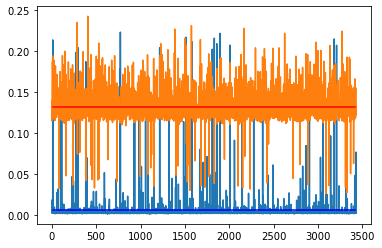

In [68]:
## Infiltration
AE_normal_mae = mae_byte_list_normal[0:3432]
plt.plot(AE_normal_mae)
# plt.fill_between([i for i in range(3432)],np.array(AE_normal_mae).mean() + np.array(AE_normal_mae).std(),\
#                  max(np.array(AE_normal_mae).mean() - np.array(AE_normal_mae).std(),0),color = "black",alpha = 0.3)
plt.axhline(y = np.array(AE_normal_mae).mean(), color = 'blue', linestyle = '-',xmin = 0.05, xmax = 0.95)

AE_infiltration_attack_mae = mae_byte_list[0:3432]
plt.plot(AE_infiltration_attack_mae)
# plt.fill_between([i for i in range(3432)],np.array(AE_infiltration_attack_mae).mean() - np.array(AE_infiltration_attack_mae).std(),\
#                  np.array(AE_infiltration_attack_mae).mean() + np.array(AE_infiltration_attack_mae).std(),color = "orange",alpha = 0.3)
plt.axhline(y = np.array(AE_infiltration_attack_mae).mean(), color = 'r', linestyle = '-',xmin = 0.05, xmax = 0.95)

In [ ]:
## Infiltration IP header
AE_normal_mae = ip_mae_list_normal[0:3432]
plt.plot(AE_normal_mae)
plt.fill_between([i for i in range(3432)],np.array(AE_normal_mae).mean() + np.array(AE_normal_mae).std(),\
                 max(np.array(AE_normal_mae).mean() - np.array(AE_normal_mae).std(),0),color = "black",alpha = 0.3)
plt.axhline(y = np.array(AE_normal_mae).mean(), color = 'blue', linestyle = '-',xmin = 0.05, xmax = 0.95)

AE_infiltration_attack_mae = ip_mae_list[0:3432]
plt.plot(AE_infiltration_attack_mae)
plt.fill_between([i for i in range(3432)],np.array(AE_infiltration_attack_mae).mean() - np.array(AE_infiltration_attack_mae).std(),\
                 np.array(AE_infiltration_attack_mae).mean() + np.array(AE_infiltration_attack_mae).std(),color = "orange",alpha = 0.3)
plt.axhline(y = np.array(AE_infiltration_attack_mae).mean(), color = 'r', linestyle = '-',xmin = 0.05, xmax = 0.95)

In [ ]:
## Infiltration TCP header
AE_normal_mae = tcp_header_mae_list_normal[0:3432]
plt.plot(AE_normal_mae)
plt.fill_between([i for i in range(3432)],np.array(AE_normal_mae).mean() + np.array(AE_normal_mae).std(),\
                 max(np.array(AE_normal_mae).mean() - np.array(AE_normal_mae).std(),0),color = "black",alpha = 0.3)
plt.axhline(y = np.array(AE_normal_mae).mean(), color = 'blue', linestyle = '-',xmin = 0.05, xmax = 0.95)

AE_infiltration_attack_mae = tcp_header_mae_list[0:3432]
plt.plot(AE_infiltration_attack_mae)
plt.fill_between([i for i in range(3432)],np.array(AE_infiltration_attack_mae).mean() - np.array(AE_infiltration_attack_mae).std(),\
                 np.array(AE_infiltration_attack_mae).mean() + np.array(AE_infiltration_attack_mae).std(),color = "orange",alpha = 0.3)
plt.axhline(y = np.array(AE_infiltration_attack_mae).mean(), color = 'r', linestyle = '-',xmin = 0.05, xmax = 0.95)

In [ ]:
## Infiltration TCP Options
AE_normal_mae = tcp_options_mae_list_normal[0:3432]
plt.plot(AE_normal_mae)
plt.fill_between([i for i in range(3432)],np.array(AE_normal_mae).mean() + np.array(AE_normal_mae).std(),\
                 max(np.array(AE_normal_mae).mean() - np.array(AE_normal_mae).std(),0),color = "black",alpha = 0.3)
plt.axhline(y = np.array(AE_normal_mae).mean(), color = 'blue', linestyle = '-',xmin = 0.05, xmax = 0.95)

AE_infiltration_attack_mae = tcp_options_mae_list[0:3432]
plt.plot(AE_infiltration_attack_mae)
plt.fill_between([i for i in range(3432)],np.array(AE_infiltration_attack_mae).mean() - np.array(AE_infiltration_attack_mae).std(),\
                 np.array(AE_infiltration_attack_mae).mean() + np.array(AE_infiltration_attack_mae).std(),color = "orange",alpha = 0.3)
plt.axhline(y = np.array(AE_infiltration_attack_mae).mean(), color = 'r', linestyle = '-',xmin = 0.05, xmax = 0.95)

In [ ]:
## Infiltration Segment
AE_normal_mae = tcp_segment_mae_list_normal[0:3432]
plt.plot(AE_normal_mae)
plt.fill_between([i for i in range(3432)],np.array(AE_normal_mae).mean() + np.array(AE_normal_mae).std(),\
                 max(np.array(AE_normal_mae).mean() - np.array(AE_normal_mae).std(),0),color = "black",alpha = 0.3)
plt.axhline(y = np.array(AE_normal_mae).mean(), color = 'blue', linestyle = '-',xmin = 0.05, xmax = 0.95)

AE_infiltration_attack_mae = tcp_segment_mae_list[0:3432]
plt.plot(AE_infiltration_attack_mae)
plt.fill_between([i for i in range(3432)],np.array(AE_infiltration_attack_mae).mean() - np.array(AE_infiltration_attack_mae).std(),\
                 np.array(AE_infiltration_attack_mae).mean() + np.array(AE_infiltration_attack_mae).std(),color = "orange",alpha = 0.3)
plt.axhline(y = np.array(AE_infiltration_attack_mae).mean(), color = 'r', linestyle = '-',xmin = 0.05, xmax = 0.95)

In [ ]:
mae_byte_avg = sum(mae_byte_list) / np.count_nonzero(mae_byte_list)
print('mae_byte_avg', mae_byte_avg)
mae_byte_per_95 = np.percentile(mae_byte_list, 99)
print('mae_byte_99_percentile', mae_byte_per_95)
mae_byte_per_95 = np.percentile(mae_byte_list, 95)
print('mae_byte_95_percentile', mae_byte_per_95)
mae_byte_per_95 = np.percentile(mae_byte_list, 90)
print('mae_byte_90_percentile', mae_byte_per_95)
ip_mae_avg = sum(ip_mae_list) / np.count_nonzero(ip_mae_list)
print('ip_mae_avg', ip_mae_avg)
tcp_header_mae_avg = sum(tcp_header_mae_list) / np.count_nonzero(tcp_header_mae_list)
print('tcp_header_mae_avg', tcp_header_mae_avg)
tcp_options_mae_avg = sum(tcp_options_mae_list) / np.count_nonzero(tcp_options_mae_list)
print('tcp_header_mae_avg', tcp_options_mae_avg)
tcp_segment_mae_avg = sum(tcp_segment_mae_list) / np.count_nonzero(tcp_segment_mae_list)
print('tcp_segment_mae_avg', tcp_segment_mae_avg)

In [69]:
recon_web = model.predict(web_attack)

In [70]:
mae_byte_list, ip_mae_list, tcp_header_mae_list, tcp_options_mae_list, tcp_segment_mae_list = recon_metrices(web_attack, recon_web)

In [71]:
## Classification
count_99 = len([i for i in mae_byte_list if i > 0.086])
print(count_99 / len(mae_byte_list))
count_95 = len([i for i in mae_byte_list if i > 0.011])
print(count_95 / len(mae_byte_list))
count_90 = len([i for i in mae_byte_list if i > 0.005])
print(count_90 / len(mae_byte_list))

0.9986525937570178
1.0
1.0


In [72]:
# save numpy array as csv file
from numpy import asarray
from numpy import savetxt

savetxt('AE_web_MAE.csv', mae_byte_list, delimiter=',')

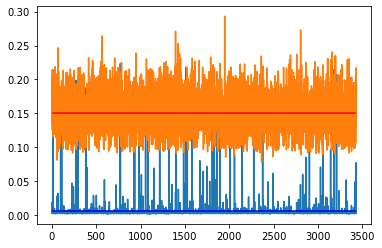

In [74]:
## Web attack
AE_normal_mae = mae_byte_list_normal[0:3432]
plt.plot(AE_normal_mae)
# plt.fill_between([i for i in range(3432)],np.array(AE_normal_mae).mean() + np.array(AE_normal_mae).std(),\
#                  max(np.array(AE_normal_mae).mean() - np.array(AE_normal_mae).std(),0),color = "black",alpha = 0.3)
plt.axhline(y = np.array(AE_normal_mae).mean(), color = 'blue', linestyle = '-',xmin = 0.05, xmax = 0.95)

AE_infiltration_attack_mae = mae_byte_list[0:3432]
plt.plot(AE_infiltration_attack_mae)
# plt.fill_between([i for i in range(3432)],np.array(AE_infiltration_attack_mae).mean() - np.array(AE_infiltration_attack_mae).std(),\
#                  np.array(AE_infiltration_attack_mae).mean() + np.array(AE_infiltration_attack_mae).std(),color = "orange",alpha = 0.3)
plt.axhline(y = np.array(AE_infiltration_attack_mae).mean(), color = 'r', linestyle = '-',xmin = 0.05, xmax = 0.95)

In [ ]:
## Webattack IP header
AE_normal_mae = ip_mae_list_normal[0:3432]
plt.plot(AE_normal_mae)
plt.fill_between([i for i in range(3432)],np.array(AE_normal_mae).mean() + np.array(AE_normal_mae).std(),\
                 max(np.array(AE_normal_mae).mean() - np.array(AE_normal_mae).std(),0),color = "black",alpha = 0.3)
plt.axhline(y = np.array(AE_normal_mae).mean(), color = 'blue', linestyle = '-',xmin = 0.05, xmax = 0.95)

AE_infiltration_attack_mae = ip_mae_list[0:3432]
plt.plot(AE_infiltration_attack_mae)
plt.fill_between([i for i in range(3432)],np.array(AE_infiltration_attack_mae).mean() - np.array(AE_infiltration_attack_mae).std(),\
                 np.array(AE_infiltration_attack_mae).mean() + np.array(AE_infiltration_attack_mae).std(),color = "orange",alpha = 0.3)
plt.axhline(y = np.array(AE_infiltration_attack_mae).mean(), color = 'r', linestyle = '-',xmin = 0.05, xmax = 0.95)

In [ ]:
## Webattack TCP header
AE_normal_mae = tcp_header_mae_list_normal[0:3432]
plt.plot(AE_normal_mae)
plt.fill_between([i for i in range(3432)],np.array(AE_normal_mae).mean() + np.array(AE_normal_mae).std(),\
                 max(np.array(AE_normal_mae).mean() - np.array(AE_normal_mae).std(),0),color = "black",alpha = 0.3)
plt.axhline(y = np.array(AE_normal_mae).mean(), color = 'blue', linestyle = '-',xmin = 0.05, xmax = 0.95)

AE_infiltration_attack_mae = tcp_header_mae_list[0:3432]
plt.plot(AE_infiltration_attack_mae)
plt.fill_between([i for i in range(3432)],np.array(AE_infiltration_attack_mae).mean() - np.array(AE_infiltration_attack_mae).std(),\
                 np.array(AE_infiltration_attack_mae).mean() + np.array(AE_infiltration_attack_mae).std(),color = "orange",alpha = 0.3)
plt.axhline(y = np.array(AE_infiltration_attack_mae).mean(), color = 'r', linestyle = '-',xmin = 0.05, xmax = 0.95)

In [ ]:
## Webattack TCP Options
AE_normal_mae = tcp_options_mae_list_normal[0:3432]
plt.plot(AE_normal_mae)
plt.fill_between([i for i in range(3432)],np.array(AE_normal_mae).mean() + np.array(AE_normal_mae).std(),\
                 max(np.array(AE_normal_mae).mean() - np.array(AE_normal_mae).std(),0),color = "black",alpha = 0.3)
plt.axhline(y = np.array(AE_normal_mae).mean(), color = 'blue', linestyle = '-',xmin = 0.05, xmax = 0.95)

AE_infiltration_attack_mae = tcp_options_mae_list[0:3432]
plt.plot(AE_infiltration_attack_mae)
plt.fill_between([i for i in range(3432)],np.array(AE_infiltration_attack_mae).mean() - np.array(AE_infiltration_attack_mae).std(),\
                 np.array(AE_infiltration_attack_mae).mean() + np.array(AE_infiltration_attack_mae).std(),color = "orange",alpha = 0.3)
plt.axhline(y = np.array(AE_infiltration_attack_mae).mean(), color = 'r', linestyle = '-',xmin = 0.05, xmax = 0.95)

In [ ]:
## Webattack Segment
AE_normal_mae = tcp_segment_mae_list_normal[0:3432]
plt.plot(AE_normal_mae)
plt.fill_between([i for i in range(3432)],np.array(AE_normal_mae).mean() + np.array(AE_normal_mae).std(),\
                 max(np.array(AE_normal_mae).mean() - np.array(AE_normal_mae).std(),0),color = "black",alpha = 0.3)
plt.axhline(y = np.array(AE_normal_mae).mean(), color = 'blue', linestyle = '-',xmin = 0.05, xmax = 0.95)

AE_infiltration_attack_mae = tcp_segment_mae_list[0:3432]
plt.plot(AE_infiltration_attack_mae)
plt.fill_between([i for i in range(3432)],np.array(AE_infiltration_attack_mae).mean() - np.array(AE_infiltration_attack_mae).std(),\
                 np.array(AE_infiltration_attack_mae).mean() + np.array(AE_infiltration_attack_mae).std(),color = "orange",alpha = 0.3)
plt.axhline(y = np.array(AE_infiltration_attack_mae).mean(), color = 'r', linestyle = '-',xmin = 0.05, xmax = 0.95)

In [75]:
mae_byte_avg = sum(mae_byte_list) / np.count_nonzero(mae_byte_list)
print('mae_byte_avg', mae_byte_avg)
mae_byte_per_95 = np.percentile(mae_byte_list, 99)
print('mae_byte_99_percentile', mae_byte_per_95)
mae_byte_per_95 = np.percentile(mae_byte_list, 95)
print('mae_byte_95_percentile', mae_byte_per_95)
mae_byte_per_95 = np.percentile(mae_byte_list, 90)
print('mae_byte_90_percentile', mae_byte_per_95)
ip_mae_avg = sum(ip_mae_list) / np.count_nonzero(ip_mae_list)
print('ip_mae_avg', ip_mae_avg)
tcp_header_mae_avg = sum(tcp_header_mae_list) / np.count_nonzero(tcp_header_mae_list)
print('tcp_header_mae_avg', tcp_header_mae_avg)
tcp_options_mae_avg = sum(tcp_options_mae_list) / np.count_nonzero(tcp_options_mae_list)
print('tcp_header_mae_avg', tcp_options_mae_avg)
tcp_segment_mae_avg = sum(tcp_segment_mae_list) / np.count_nonzero(tcp_segment_mae_list)
print('tcp_segment_mae_avg', tcp_segment_mae_avg)

mae_byte_avg 0.15104976702673048
mae_byte_99_percentile 0.22585707839017224
mae_byte_95_percentile 0.2045867702072937
mae_byte_90_percentile 0.19317598852508777
ip_mae_avg 0.19031216940394372
tcp_header_mae_avg 0.14097443975076188
tcp_header_mae_avg 0.2916767527133511
tcp_segment_mae_avg 0.10740047446416856


In [76]:
recon_brute = model.predict(bruteforce_attack)

In [77]:
mae_byte_list, ip_mae_list, tcp_header_mae_list, tcp_options_mae_list, tcp_segment_mae_list = recon_metrices(bruteforce_attack, recon_brute)

In [78]:
## Classification
count_99 = len([i for i in mae_byte_list if i > 0.086])
print(count_99 / len(mae_byte_list))
count_95 = len([i for i in mae_byte_list if i > 0.011])
print(count_95 / len(mae_byte_list))
count_90 = len([i for i in mae_byte_list if i > 0.005])
print(count_90 / len(mae_byte_list))

0.9961819202695115
1.0
1.0


In [79]:
# save numpy array as csv file
from numpy import asarray
from numpy import savetxt

savetxt('AE_brute_MAE.csv', mae_byte_list, delimiter=',')

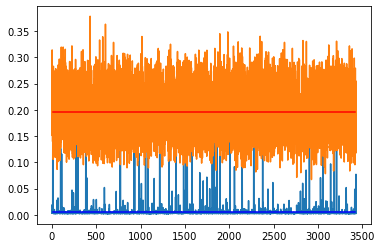

In [81]:
## Brute Force
AE_normal_mae = mae_byte_list_normal[0:3432]
plt.plot(AE_normal_mae)
# plt.fill_between([i for i in range(3432)],np.array(AE_normal_mae).mean() + np.array(AE_normal_mae).std(),\
#                  max(np.array(AE_normal_mae).mean() - np.array(AE_normal_mae).std(),0),color = "black",alpha = 0.3)
plt.axhline(y = np.array(AE_normal_mae).mean(), color = 'blue', linestyle = '-',xmin = 0.05, xmax = 0.95)

AE_infiltration_attack_mae = mae_byte_list[0:3432]
plt.plot(AE_infiltration_attack_mae)
# plt.fill_between([i for i in range(3432)],np.array(AE_infiltration_attack_mae).mean() - np.array(AE_infiltration_attack_mae).std(),\
#                  np.array(AE_infiltration_attack_mae).mean() + np.array(AE_infiltration_attack_mae).std(),color = "orange",alpha = 0.3)
plt.axhline(y = np.array(AE_infiltration_attack_mae).mean(), color = 'r', linestyle = '-',xmin = 0.05, xmax = 0.95)

In [82]:
mae_byte_avg = sum(mae_byte_list) / np.count_nonzero(mae_byte_list)
print('mae_byte_avg', mae_byte_avg)
mae_byte_per_95 = np.percentile(mae_byte_list, 99)
print('mae_byte_99_percentile', mae_byte_per_95)
mae_byte_per_95 = np.percentile(mae_byte_list, 95)
print('mae_byte_95_percentile', mae_byte_per_95)
mae_byte_per_95 = np.percentile(mae_byte_list, 90)
print('mae_byte_90_percentile', mae_byte_per_95)
ip_mae_avg = sum(ip_mae_list) / np.count_nonzero(ip_mae_list)
print('ip_mae_avg', ip_mae_avg)
tcp_header_mae_avg = sum(tcp_header_mae_list) / np.count_nonzero(tcp_header_mae_list)
print('tcp_header_mae_avg', tcp_header_mae_avg)
tcp_options_mae_avg = sum(tcp_options_mae_list) / np.count_nonzero(tcp_options_mae_list)
print('tcp_header_mae_avg', tcp_options_mae_avg)
tcp_segment_mae_avg = sum(tcp_segment_mae_list) / np.count_nonzero(tcp_segment_mae_list)
print('tcp_segment_mae_avg', tcp_segment_mae_avg)

mae_byte_avg 0.19544229590346285
mae_byte_99_percentile 0.31244355647523037
mae_byte_95_percentile 0.2877597519668681
mae_byte_90_percentile 0.2753138923741692
ip_mae_avg 0.19509633164188242
tcp_header_mae_avg 0.1635996752319312
tcp_header_mae_avg 0.23951962431240809
tcp_segment_mae_avg 0.25555409370826226


In [ ]:
## CICIDS 2018

In [ ]:
# df_2018 = pd.read_csv("all_group_train_normalized_2018.csv")

In [ ]:
infiltration_attack = df_2018[df_2018['Label'] == 'Infiltration'].drop(['Label_binary','Label'], axis=1).iloc[:,0:200]
print(infiltration_attack.shape)
# portscan_attack = df_2018[df_2018['Label'] == 'Port Scan'].drop(['Label_binary','Label'], axis=1).iloc[:,0:200]
# print(portscan_attack.shape)
ddos_attack = df_2018[df_2018['Label'] == 'ddos'].drop(['Label_binary','Label'], axis=1).iloc[:,0:200]
print(ddos_attack.shape)
bruteforce_attack = df_2018[df_2018['Label'] == 'Brute Force'].drop(['Label_binary','Label'], axis=1).iloc[:,0:200]
print(bruteforce_attack.shape)
dos_attack = df_2018[df_2018['Label'] == 'DoS'].drop(['Label_binary','Label'], axis=1).iloc[:,0:200]
print(dos_attack.shape)
web_attack = df_2018[df_2018['Label'] == 'Web Attack'].drop(['Label_binary','Label'], axis=1).iloc[:,0:200]
print(web_attack.shape)

In [ ]:
recon_dos = model.predict(dos_attack)

In [ ]:
mae_byte_list, ip_mae_list, tcp_header_mae_list, tcp_options_mae_list, tcp_segment_mae_list = recon_metrices(dos_attack, recon_dos)

In [ ]:
## Classification
count_99 = len([i for i in mae_byte_list if i > 0.086])
print(count_99 / len(mae_byte_list))
count_95 = len([i for i in mae_byte_list if i > 0.011])
print(count_95 / len(mae_byte_list))
count_90 = len([i for i in mae_byte_list if i > 0.005])
print(count_90 / len(mae_byte_list))

In [ ]:
## DoS
AE_normal_mae = mae_byte_list_normal[0:3432]
plt.plot(AE_normal_mae)
plt.fill_between([i for i in range(3432)],np.array(AE_normal_mae).mean() + np.array(AE_normal_mae).std(),\
                 max(np.array(AE_normal_mae).mean() - np.array(AE_normal_mae).std(),0),color = "black",alpha = 0.3)
plt.axhline(y = np.array(AE_normal_mae).mean(), color = 'blue', linestyle = '-',xmin = 0.05, xmax = 0.95)

AE_infiltration_attack_mae = mae_byte_list[0:3432]
plt.plot(AE_infiltration_attack_mae)
plt.fill_between([i for i in range(3432)],np.array(AE_infiltration_attack_mae).mean() - np.array(AE_infiltration_attack_mae).std(),\
                 np.array(AE_infiltration_attack_mae).mean() + np.array(AE_infiltration_attack_mae).std(),color = "orange",alpha = 0.3)
plt.axhline(y = np.array(AE_infiltration_attack_mae).mean(), color = 'r', linestyle = '-',xmin = 0.05, xmax = 0.95)

In [ ]:
mae_byte_avg = sum(mae_byte_list) / np.count_nonzero(mae_byte_list)
print('mae_byte_avg', mae_byte_avg)
mae_byte_per_95 = np.percentile(mae_byte_list, 99)
print('mae_byte_99_percentile', mae_byte_per_95)
mae_byte_per_95 = np.percentile(mae_byte_list, 95)
print('mae_byte_95_percentile', mae_byte_per_95)
mae_byte_per_95 = np.percentile(mae_byte_list, 90)
print('mae_byte_90_percentile', mae_byte_per_95)
ip_mae_avg = sum(ip_mae_list) / np.count_nonzero(ip_mae_list)
print('ip_mae_avg', ip_mae_avg)
tcp_header_mae_avg = sum(tcp_header_mae_list) / np.count_nonzero(tcp_header_mae_list)
print('tcp_header_mae_avg', tcp_header_mae_avg)
tcp_options_mae_avg = sum(tcp_options_mae_list) / np.count_nonzero(tcp_options_mae_list)
print('tcp_header_mae_avg', tcp_options_mae_avg)
tcp_segment_mae_avg = sum(tcp_segment_mae_list) / np.count_nonzero(tcp_segment_mae_list)
print('tcp_segment_mae_avg', tcp_segment_mae_avg)

In [ ]:
recon_ddos = model.predict(ddos_attack)

In [ ]:
recon_inf = model.predict(infiltration_attack)

In [ ]:
recon_web = model.predict(web_attack)

In [ ]:
recon_brute = model.predict(bruteforce_attack)

In [ ]:
mae_byte_list, ip_mae_list, tcp_header_mae_list, tcp_options_mae_list, tcp_segment_mae_list = recon_metrices(bruteforce_attack, recon_brute)

In [ ]:
## Classification
count_99 = len([i for i in mae_byte_list if i > 0.086])
print(count_99 / len(mae_byte_list))
count_95 = len([i for i in mae_byte_list if i > 0.011])
print(count_95 / len(mae_byte_list))
count_90 = len([i for i in mae_byte_list if i > 0.005])
print(count_90 / len(mae_byte_list))

In [ ]:
####
AE_normal_mae = mae_byte_list_normal[0:3432]
plt.plot(AE_normal_mae)
plt.fill_between([i for i in range(3432)],np.array(AE_normal_mae).mean() + np.array(AE_normal_mae).std(),\
                 max(np.array(AE_normal_mae).mean() - np.array(AE_normal_mae).std(),0),color = "black",alpha = 0.3)
plt.axhline(y = np.array(AE_normal_mae).mean(), color = 'blue', linestyle = '-',xmin = 0.05, xmax = 0.95)

AE_infiltration_attack_mae = mae_byte_list[0:3432]
plt.plot(AE_infiltration_attack_mae)
plt.fill_between([i for i in range(3432)],np.array(AE_infiltration_attack_mae).mean() - np.array(AE_infiltration_attack_mae).std(),\
                 np.array(AE_infiltration_attack_mae).mean() + np.array(AE_infiltration_attack_mae).std(),color = "orange",alpha = 0.3)
plt.axhline(y = np.array(AE_infiltration_attack_mae).mean(), color = 'r', linestyle = '-',xmin = 0.05, xmax = 0.95)

In [ ]:
mae_byte_avg = sum(mae_byte_list) / np.count_nonzero(mae_byte_list)
print('mae_byte_avg', mae_byte_avg)
mae_byte_per_95 = np.percentile(mae_byte_list, 99)
print('mae_byte_99_percentile', mae_byte_per_95)
mae_byte_per_95 = np.percentile(mae_byte_list, 95)
print('mae_byte_95_percentile', mae_byte_per_95)
mae_byte_per_95 = np.percentile(mae_byte_list, 90)
print('mae_byte_90_percentile', mae_byte_per_95)
ip_mae_avg = sum(ip_mae_list) / np.count_nonzero(ip_mae_list)
print('ip_mae_avg', ip_mae_avg)
tcp_header_mae_avg = sum(tcp_header_mae_list) / np.count_nonzero(tcp_header_mae_list)
print('tcp_header_mae_avg', tcp_header_mae_avg)
tcp_options_mae_avg = sum(tcp_options_mae_list) / np.count_nonzero(tcp_options_mae_list)
print('tcp_header_mae_avg', tcp_options_mae_avg)
tcp_segment_mae_avg = sum(tcp_segment_mae_list) / np.count_nonzero(tcp_segment_mae_list)
print('tcp_segment_mae_avg', tcp_segment_mae_avg)

In [ ]:
#IP header - 0-8 
#TCP header - 9-24
#TCP Options - 25-64
# TCP Segment - 65-199

In [ ]:
### Adv examples

In [87]:
p1 = pd.read_csv('adv_examples_portscan_DT.csv')
p2 = pd.read_csv('adv_examples_portscan_RF.csv')
p3 = pd.read_csv('adv_examples_portscan_SVC.csv')
p4 = pd.read_csv('adv_examples_portscan_MLP.csv')

In [88]:
port_adv = pd.concat([p1,p2,p3,p4]).sample(frac = 1).iloc[:,0:200]

In [89]:
recon_adv_port = model.predict(port_adv)

In [90]:
mae_byte_list, ip_mae_list, tcp_header_mae_list, tcp_options_mae_list, tcp_segment_mae_list = recon_metrices(port_adv, recon_adv_port)

In [91]:
## Classification
## Classification
count_99 = len([i for i in mae_byte_list if i > 0.086])
print(count_99 / len(mae_byte_list))
count_95 = len([i for i in mae_byte_list if i > 0.011])
print(count_95 / len(mae_byte_list))
count_90 = len([i for i in mae_byte_list if i > 0.005])
print(count_90 / len(mae_byte_list))

1.0
1.0
1.0


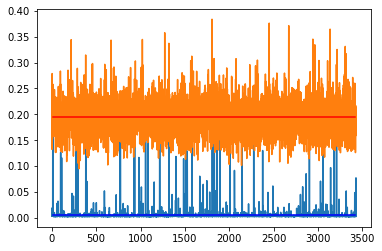

In [94]:
## Adv portscan
AE_normal_mae = mae_byte_list_normal[0:3432]
plt.plot(AE_normal_mae)
# plt.fill_between([i for i in range(3432)],np.array(AE_normal_mae).mean() + np.array(AE_normal_mae).std(),\
#                  max(np.array(AE_normal_mae).mean() - np.array(AE_normal_mae).std(),0),color = "black",alpha = 0.3)
plt.axhline(y = np.array(AE_normal_mae).mean(), color = 'blue', linestyle = '-',xmin = 0.05, xmax = 0.95)

AE_infiltration_attack_mae = mae_byte_list[0:3432]
plt.plot(AE_infiltration_attack_mae)
# plt.fill_between([i for i in range(3432)],np.array(AE_infiltration_attack_mae).mean() - np.array(AE_infiltration_attack_mae).std(),\
#                  np.array(AE_infiltration_attack_mae).mean() + np.array(AE_infiltration_attack_mae).std(),color = "orange",alpha = 0.3)
plt.axhline(y = np.array(AE_infiltration_attack_mae).mean(), color = 'r', linestyle = '-',xmin = 0.05, xmax = 0.95)

In [93]:
mae_byte_avg = sum(mae_byte_list) / np.count_nonzero(mae_byte_list)
print('mae_byte_avg', mae_byte_avg)
mae_byte_per_95 = np.percentile(mae_byte_list, 99)
print('mae_byte_99_percentile', mae_byte_per_95)
mae_byte_per_95 = np.percentile(mae_byte_list, 95)
print('mae_byte_95_percentile', mae_byte_per_95)
mae_byte_per_95 = np.percentile(mae_byte_list, 90)
print('mae_byte_90_percentile', mae_byte_per_95)
ip_mae_avg = sum(ip_mae_list) / np.count_nonzero(ip_mae_list)
print('ip_mae_avg', ip_mae_avg)
tcp_header_mae_avg = sum(tcp_header_mae_list) / np.count_nonzero(tcp_header_mae_list)
print('tcp_header_mae_avg', tcp_header_mae_avg)
tcp_options_mae_avg = sum(tcp_options_mae_list) / np.count_nonzero(tcp_options_mae_list)
print('tcp_header_mae_avg', tcp_options_mae_avg)
tcp_segment_mae_avg = sum(tcp_segment_mae_list) / np.count_nonzero(tcp_segment_mae_list)
print('tcp_segment_mae_avg', tcp_segment_mae_avg)

mae_byte_avg 0.19567464593464767
mae_byte_99_percentile 0.28538804894540043
mae_byte_95_percentile 0.25032961863772285
mae_byte_90_percentile 0.2367863177739912
ip_mae_avg 0.20965606618015825
tcp_header_mae_avg 0.2514485786968571
tcp_header_mae_avg 0.29603014952683
tcp_segment_mae_avg 0.162929146912009


In [95]:
d1 = pd.read_csv('adv_examples_dos_DT.csv')
d2 = pd.read_csv('adv_examples_dos_RF.csv')
d3 = pd.read_csv('adv_examples_dos_SVC.csv')
d4 = pd.read_csv('adv_examples_dos_MLP.csv')

In [96]:
dos_adv = pd.concat([d1,d2,d3,d4]).sample(frac = 1).iloc[:,0:200]

In [111]:
recon_adv_dos = model.predict(dos_adv)

In [112]:
mae_byte_list, ip_mae_list, tcp_header_mae_list, tcp_options_mae_list, tcp_segment_mae_list = recon_metrices(dos_adv, recon_adv_dos)

In [113]:
## Classification
count_99 = len([i for i in mae_byte_list if i > 0.086])
print(count_99 / len(mae_byte_list))
count_95 = len([i for i in mae_byte_list if i > 0.011])
print(count_95 / len(mae_byte_list))
count_90 = len([i for i in mae_byte_list if i > 0.005])
print(count_90 / len(mae_byte_list))

0.972121426674927
1.0
1.0


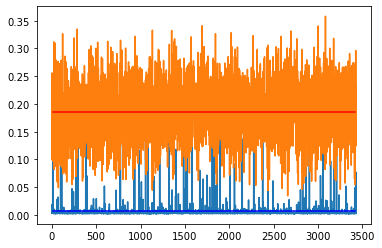

In [114]:
## Adv portscan
AE_normal_mae = mae_byte_list_normal[0:3432]
plt.plot(AE_normal_mae)
# plt.fill_between([i for i in range(3432)],np.array(AE_normal_mae).mean() + np.array(AE_normal_mae).std(),\
#                  max(np.array(AE_normal_mae).mean() - np.array(AE_normal_mae).std(),0),color = "black",alpha = 0.3)
plt.axhline(y = np.array(AE_normal_mae).mean(), color = 'blue', linestyle = '-',xmin = 0.05, xmax = 0.95)

AE_infiltration_attack_mae = mae_byte_list[0:3432]
plt.plot(AE_infiltration_attack_mae)
# plt.fill_between([i for i in range(3432)],np.array(AE_infiltration_attack_mae).mean() - np.array(AE_infiltration_attack_mae).std(),\
#                  np.array(AE_infiltration_attack_mae).mean() + np.array(AE_infiltration_attack_mae).std(),color = "orange",alpha = 0.3)
plt.axhline(y = np.array(AE_infiltration_attack_mae).mean(), color = 'r', linestyle = '-',xmin = 0.05, xmax = 0.95)

In [115]:
mae_byte_avg = sum(mae_byte_list) / np.count_nonzero(mae_byte_list)
print('mae_byte_avg', mae_byte_avg)
mae_byte_per_95 = np.percentile(mae_byte_list, 99)
print('mae_byte_99_percentile', mae_byte_per_95)
mae_byte_per_95 = np.percentile(mae_byte_list, 95)
print('mae_byte_95_percentile', mae_byte_per_95)
mae_byte_per_95 = np.percentile(mae_byte_list, 90)
print('mae_byte_90_percentile', mae_byte_per_95)
ip_mae_avg = sum(ip_mae_list) / np.count_nonzero(ip_mae_list)
print('ip_mae_avg', ip_mae_avg)
tcp_header_mae_avg = sum(tcp_header_mae_list) / np.count_nonzero(tcp_header_mae_list)
print('tcp_header_mae_avg', tcp_header_mae_avg)
tcp_options_mae_avg = sum(tcp_options_mae_list) / np.count_nonzero(tcp_options_mae_list)
print('tcp_header_mae_avg', tcp_options_mae_avg)
tcp_segment_mae_avg = sum(tcp_segment_mae_list) / np.count_nonzero(tcp_segment_mae_list)
print('tcp_segment_mae_avg', tcp_segment_mae_avg)

mae_byte_avg 0.1849636104368831
mae_byte_99_percentile 0.30139605475261827
mae_byte_95_percentile 0.26456921387545257
mae_byte_90_percentile 0.24707689088042467
ip_mae_avg 0.20923526819415478
tcp_header_mae_avg 0.196178777840396
tcp_header_mae_avg 0.2601077862911878
tcp_segment_mae_avg 0.16516827648585214


In [102]:
dd1 = pd.read_csv('adv_examples_ddos_DT.csv')
dd2 = pd.read_csv('adv_examples_ddos_RF.csv')
dd3 = pd.read_csv('adv_examples_ddos_SVC.csv')
dd4 = pd.read_csv('adv_examples_ddos_MLP.csv')

In [103]:
ddos_adv = pd.concat([dd1,dd2,dd3,dd4]).sample(frac = 1).iloc[:,0:200]

In [116]:
recon_adv_ddos = model.predict(ddos_adv)

In [117]:
mae_byte_list, ip_mae_list, tcp_header_mae_list, tcp_options_mae_list, tcp_segment_mae_list = recon_metrices(ddos_adv, recon_adv_ddos)

In [118]:
## Classification
count_99 = len([i for i in mae_byte_list if i > 0.086])
print(count_99 / len(mae_byte_list))
count_95 = len([i for i in mae_byte_list if i > 0.011])
print(count_95 / len(mae_byte_list))
count_90 = len([i for i in mae_byte_list if i > 0.005])
print(count_90 / len(mae_byte_list))

0.9938994498611036
1.0
1.0


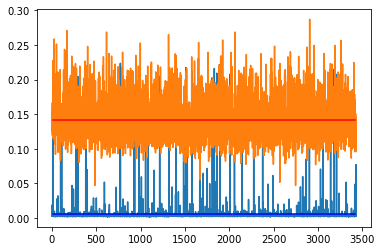

In [119]:
## Adv portscan
AE_normal_mae = mae_byte_list_normal[0:3432]
plt.plot(AE_normal_mae)
# plt.fill_between([i for i in range(3432)],np.array(AE_normal_mae).mean() + np.array(AE_normal_mae).std(),\
#                  max(np.array(AE_normal_mae).mean() - np.array(AE_normal_mae).std(),0),color = "black",alpha = 0.3)
plt.axhline(y = np.array(AE_normal_mae).mean(), color = 'blue', linestyle = '-',xmin = 0.05, xmax = 0.95)

AE_infiltration_attack_mae = mae_byte_list[0:3432]
plt.plot(AE_infiltration_attack_mae)
# plt.fill_between([i for i in range(3432)],np.array(AE_infiltration_attack_mae).mean() - np.array(AE_infiltration_attack_mae).std(),\
#                  np.array(AE_infiltration_attack_mae).mean() + np.array(AE_infiltration_attack_mae).std(),color = "orange",alpha = 0.3)
plt.axhline(y = np.array(AE_infiltration_attack_mae).mean(), color = 'r', linestyle = '-',xmin = 0.05, xmax = 0.95)

In [121]:
mae_byte_avg = sum(mae_byte_list) / np.count_nonzero(mae_byte_list)
print('mae_byte_avg', mae_byte_avg)
mae_byte_per_95 = np.percentile(mae_byte_list, 99)
print('mae_byte_99_percentile', mae_byte_per_95)
mae_byte_per_95 = np.percentile(mae_byte_list, 95)
print('mae_byte_95_percentile', mae_byte_per_95)
mae_byte_per_95 = np.percentile(mae_byte_list, 90)
print('mae_byte_90_percentile', mae_byte_per_95)
ip_mae_avg = sum(ip_mae_list) / np.count_nonzero(ip_mae_list)
print('ip_mae_avg', ip_mae_avg)
tcp_header_mae_avg = sum(tcp_header_mae_list) / np.count_nonzero(tcp_header_mae_list)
print('tcp_header_mae_avg', tcp_header_mae_avg)
tcp_options_mae_avg = sum(tcp_options_mae_list) / np.count_nonzero(tcp_options_mae_list)
print('tcp_header_mae_avg', tcp_options_mae_avg)
tcp_segment_mae_avg = sum(tcp_segment_mae_list) / np.count_nonzero(tcp_segment_mae_list)
print('tcp_segment_mae_avg', tcp_segment_mae_avg)

mae_byte_avg 0.14250444270150697
mae_byte_99_percentile 0.23230253299189257
mae_byte_95_percentile 0.203167577164319
mae_byte_90_percentile 0.18821283484289333
ip_mae_avg 0.16219742883088256
tcp_header_mae_avg 0.13308279851943686
tcp_header_mae_avg 0.12506673039273383
tcp_segment_mae_avg 0.17103604712234322


In [122]:
inf1 = pd.read_csv('adv_examples_infiltration_DT.csv')
inf2 = pd.read_csv('adv_examples_infiltration_RF.csv')
inf3 = pd.read_csv('adv_examples_infiltration_SVC.csv')
inf4 = pd.read_csv('adv_examples_infiltration_MLP.csv')

In [123]:
inf_adv = pd.concat([inf1,inf2,inf3,inf4]).sample(frac = 1).iloc[:,0:200]

In [124]:
recon_adv_inf = model.predict(inf_adv)

In [125]:
mae_byte_list, ip_mae_list, tcp_header_mae_list, tcp_options_mae_list, tcp_segment_mae_list = recon_metrices(inf_adv, recon_adv_inf)

In [126]:
## Classification
count_99 = len([i for i in mae_byte_list if i > 0.086])
print(count_99 / len(mae_byte_list))
count_95 = len([i for i in mae_byte_list if i > 0.011])
print(count_95 / len(mae_byte_list))
count_90 = len([i for i in mae_byte_list if i > 0.005])
print(count_90 / len(mae_byte_list))

0.9885288213363923
1.0
1.0


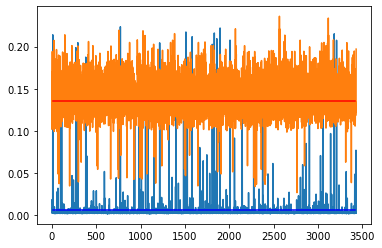

In [127]:
## Adv portscan
AE_normal_mae = mae_byte_list_normal[0:3432]
plt.plot(AE_normal_mae)
# plt.fill_between([i for i in range(3432)],np.array(AE_normal_mae).mean() + np.array(AE_normal_mae).std(),\
#                  max(np.array(AE_normal_mae).mean() - np.array(AE_normal_mae).std(),0),color = "black",alpha = 0.3)
plt.axhline(y = np.array(AE_normal_mae).mean(), color = 'blue', linestyle = '-',xmin = 0.05, xmax = 0.95)

AE_infiltration_attack_mae = mae_byte_list[0:3432]
plt.plot(AE_infiltration_attack_mae)
# plt.fill_between([i for i in range(3432)],np.array(AE_infiltration_attack_mae).mean() - np.array(AE_infiltration_attack_mae).std(),\
#                  np.array(AE_infiltration_attack_mae).mean() + np.array(AE_infiltration_attack_mae).std(),color = "orange",alpha = 0.3)
plt.axhline(y = np.array(AE_infiltration_attack_mae).mean(), color = 'r', linestyle = '-',xmin = 0.05, xmax = 0.95)

In [128]:
mae_byte_avg = sum(mae_byte_list) / np.count_nonzero(mae_byte_list)
print('mae_byte_avg', mae_byte_avg)
mae_byte_per_95 = np.percentile(mae_byte_list, 99)
print('mae_byte_99_percentile', mae_byte_per_95)
mae_byte_per_95 = np.percentile(mae_byte_list, 95)
print('mae_byte_95_percentile', mae_byte_per_95)
mae_byte_per_95 = np.percentile(mae_byte_list, 90)
print('mae_byte_90_percentile', mae_byte_per_95)
ip_mae_avg = sum(ip_mae_list) / np.count_nonzero(ip_mae_list)
print('ip_mae_avg', ip_mae_avg)
tcp_header_mae_avg = sum(tcp_header_mae_list) / np.count_nonzero(tcp_header_mae_list)
print('tcp_header_mae_avg', tcp_header_mae_avg)
tcp_options_mae_avg = sum(tcp_options_mae_list) / np.count_nonzero(tcp_options_mae_list)
print('tcp_header_mae_avg', tcp_options_mae_avg)
tcp_segment_mae_avg = sum(tcp_segment_mae_list) / np.count_nonzero(tcp_segment_mae_list)
print('tcp_segment_mae_avg', tcp_segment_mae_avg)

mae_byte_avg 0.135013092146665
mae_byte_99_percentile 0.20067849808609955
mae_byte_95_percentile 0.1826140104108022
mae_byte_90_percentile 0.17418241697918418
ip_mae_avg 0.16045792220378355
tcp_header_mae_avg 0.21048977924249399
tcp_header_mae_avg 0.16714122585580754
tcp_segment_mae_avg 0.12478534392075834
